In [2]:
%matplotlib inline
from scipy.ndimage.filters import gaussian_filter
import matplotlib.pyplot as plt
import numpy as np
from scipy.misc import face
from scipy.signal import convolve2d

(768, 1024)


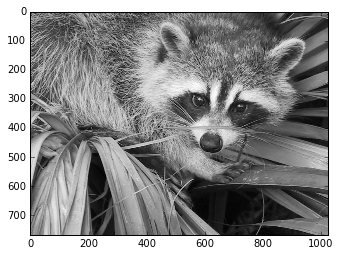

In [3]:
img = face(gray=True)
print(img.shape)
plt.imshow(img, cmap='gray')

In [5]:
def build_filter(w, h, x, y, sx , sy):
    Fx, Fy = np.indices((w, h))
    G = np.exp(-(Fx - x)**2/sx**2) * np.exp(-(Fy - y)**2/sy**2)
    G /= G.sum()
    return G


G1 = build_filter(768, 1024, 100, 100, 400, 400)
G2 = build_filter(100, 100, 50, 50, 10, 10)
res = convolve2d(img*G1, G2, mode='valid')
#plt.imshow(G * img, interpolation='none', cmap='gray')

(669, 925)


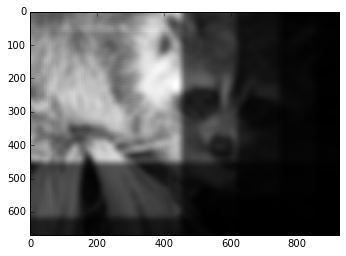

In [6]:
print(res.shape)
plt.imshow(res, cmap='gray')

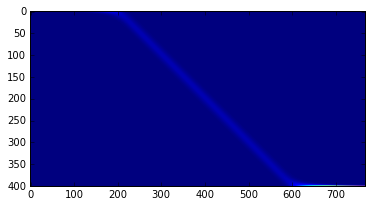

/home/ubuntu/miniconda2/envs/python2/lib/python2.7/site-packages/ipykernel/__main__.py:22: RuntimeWarning: invalid value encountered in divide


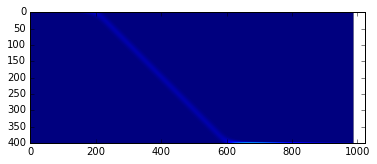

In [316]:
pw, ph = 400, 400
w = 768
h = 1024
gx = 400
gy = 400
sigma = 10
sx = 1
sy = 1

Fx, _ = np.indices((w, pw))
Fx = Fx.T
Fy, _ = np.indices((h, ph))
Fy = Fy.T
ux = gx + (np.arange(1, pw + 1) - pw/2. - 0.5) * sx
Fx = np.exp(-((Fx - ux[:, np.newaxis])**2/(2*sigma**2)))
Fx /= Fx.sum(axis=0, keepdims=True)
plt.imshow(Fx)
plt.show()

uy = gy + (np.arange(1, ph + 1) - ph/2. - 0.5) * sy
Fy = np.exp(-((Fy - uy[:, np.newaxis])**2/(2*sigma**2)))
Fy /= Fy.sum(axis=0, keepdims=True)

plt.imshow(Fy)
plt.show()

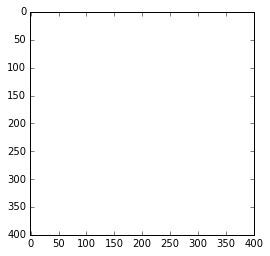

In [318]:
res = np.dot(np.dot(Fy, img.T), Fx.T).T
plt.imshow(res, cmap='gray')